# Imports

In [1]:
# Add zpic library to path
import sys

sys.path.append("../lib")

# get ZPIC 2D
import em2d as zpic
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams["figure.figsize"] = (10, 8)

# Single Particle Motion

## Constant B and Zero E

In [7]:
# Time step
dt = 0.01

# Simulation time
tmax = 22.8

# Number of cells
nx = [64, 64]

# Simulation box size
box = [6, 6]


## Plasma slabs
# Particles per cell
ppc = [4, 4]


def custom_n0(x):
    if x > 1.2 and x < 1.4:
        return 1.0
    else:
        return 0.0


# Use a custom density profile
dens = zpic.Density(type="custom", custom_x=custom_n0, custom_y=custom_n0)
# Set up a super low density
dens.n = 1e-6
# give it a small velocity to kick of the motion
ufl = 0.1
# create the species
electrons = zpic.Species("electrons", m_q=-1, ppc=ppc, density=dens, ufl=[ufl, 0, 0])
# Initialize simulation
sim = zpic.Simulation(nx, box, dt, species=electrons)
# print(electrons.particles.shape)
electrons.n_sort = 0

B = [0, 0, 1]
E = [0, 0, 0]

ext = zpic.ExternalField(B_type="uniform", B_0=B, E_type="uniform", E_0=E)

sim.emf.set_ext_fld(ext)

ele_part_rep = []
ele_energy = []
# pos_energy = []
while sim.t < 16*np.pi:
    print("n = {:d}, t = {:g}".format(sim.n, sim.t), end="\r")
    # store the electron trajectories
    ele_part_rep.append(electrons.particles[0].copy())
    ele_energy.append(electrons.energy)
    sim.iter()
# print(i)

In [8]:
# convert trajectories to position arrays
e_posx_t = [(i["ix"] + i["x"]) * box[0] / nx[0] for i in ele_part_rep]
e_posy_t = [(i["iy"] + i["y"]) * box[1] / nx[1] for i in ele_part_rep]

# create time array
t = np.linspace(0, sim.t, sim.n)

e_vx_t = np.array([(i["ux"]) for i in ele_part_rep])
e_vy_t = np.array([(i["uy"]) for i in ele_part_rep])



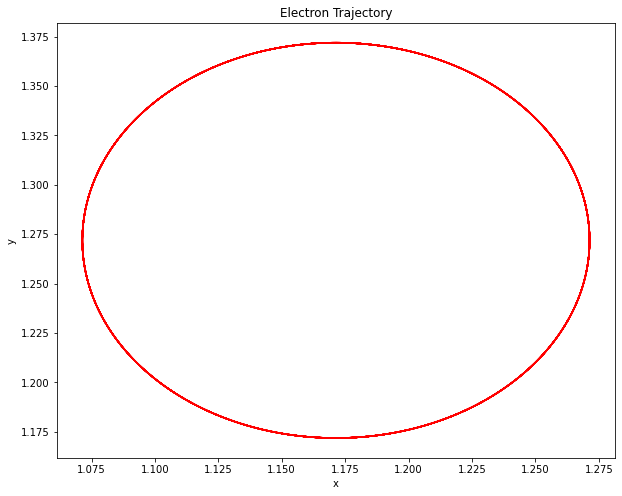

In [9]:
plt.plot(e_posx_t, e_posy_t, "r")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Electron Trajectory");

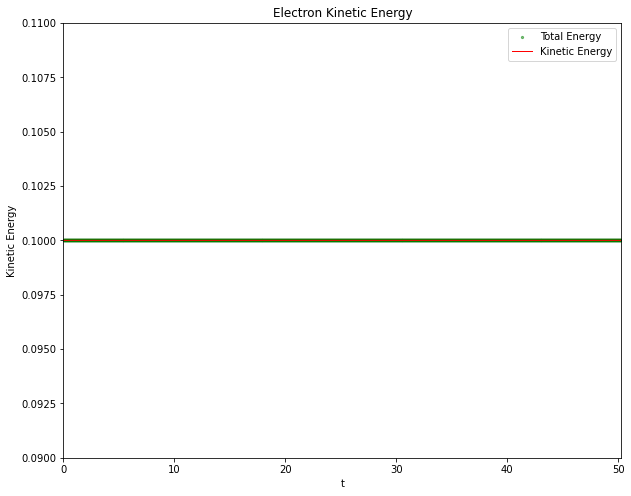

In [10]:
K = np.sqrt(e_vx_t ** 2 + e_vy_t ** 2)
total_energy = K+ele_energy
plt.scatter(t, total_energy, label="Total Energy", s=5, alpha=0.5, c="g")
plt.plot(t, K, "r", label="Kinetic Energy", linewidth=1)
plt.xlim(0, t.max())
plt.xlabel("t")
plt.ylabel("Kinetic Energy")
plt.ylim(0.09, K.max()+0.01)
plt.legend()
plt.title("Electron Kinetic Energy");

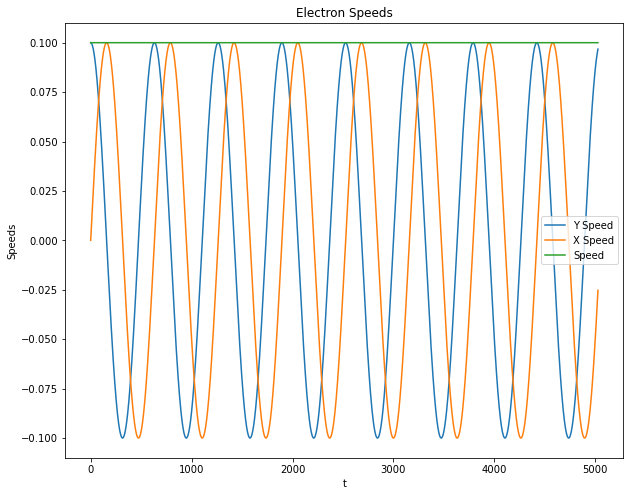

In [11]:
plt.plot(e_vx_t, label="Y Speed")
plt.plot(e_vy_t, label="X Speed")
plt.plot(np.sqrt(e_vx_t**2 + e_vy_t**2), label="Speed")
plt.xlabel("t")
plt.ylabel("Speeds")
plt.title("Electron Speeds")
plt.legend()
plt.show()

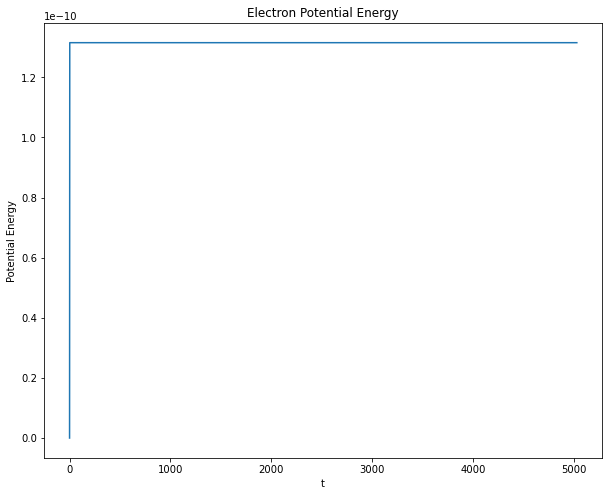

In [12]:
plt.plot(ele_energy)
plt.xlabel("t")
plt.ylabel("Potential Energy")
plt.title("Electron Potential Energy")
plt.show()

## Constant B and Constant E

In [13]:
# Time step
dt = 0.01

# Number of cells
nx = [64, 64]

# Simulation box size
box = [6, 6]


## Plasma slabs
# Particles per cell
ppc = [4, 4]

def custom_n0(x):
    if x > 1.2 and x < 1.4:
        return 1.0
    else:
        return 0.0
# Use a custom density profile
dens = zpic.Density(type="custom", custom_x=custom_n0, custom_y=custom_n0)
# Set up a super low density
dens.n = 1e-8
# give it a small velocity to kick of the motion
ufl = 0.1
# create the species
electrons = zpic.Species("electrons", m_q=-1, ppc=ppc, density=dens, ufl=[ufl, 0, 0])

# Initialize simulation
sim = zpic.Simulation(nx, box, dt, species=electrons)

electrons.n_sort = 0

B = [0, 0, 1]
E = [0, 0.01, 0]

ext = zpic.ExternalField(B_type="uniform", B_0=B, E_type="uniform", E_0=E)

sim.emf.set_ext_fld(ext)

ele_part_rep = []
ele_energy = []
# pos_energy = []
while sim.t < 15 * np.pi:
    print("n = {:d}, t = {:g}".format(sim.n, sim.t), end="\r")
    # store the electron trajectories
    ele_part_rep.append(electrons.particles[1].copy())
    ele_energy.append(electrons.energy)
    sim.iter()


In [14]:
# convert trajectories to position arrays
e_posx_t = [(i["ix"] + i["x"]) * box[0] / nx[0] for i in ele_part_rep]
e_posy_t = [(i["iy"] + i["y"]) * box[1] / nx[1] for i in ele_part_rep]

# create time array
t = np.linspace(0, sim.t, sim.n)

e_vx_t = np.array([(i["ux"]) for i in ele_part_rep])
e_vy_t = np.array([(i["uy"]) for i in ele_part_rep])

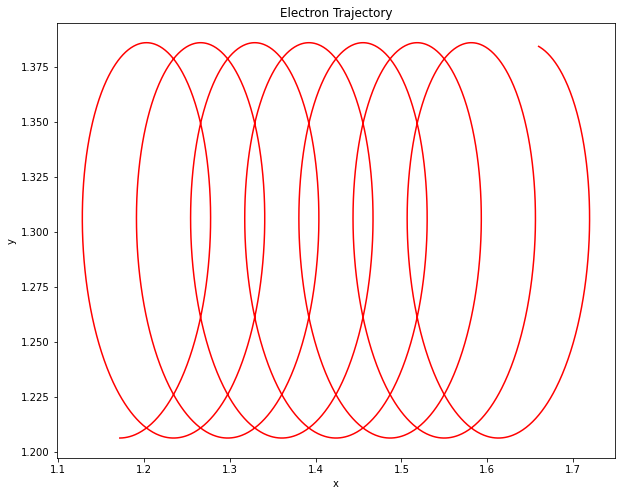

In [15]:
plt.plot(e_posx_t, e_posy_t, "r")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Electron Trajectory");

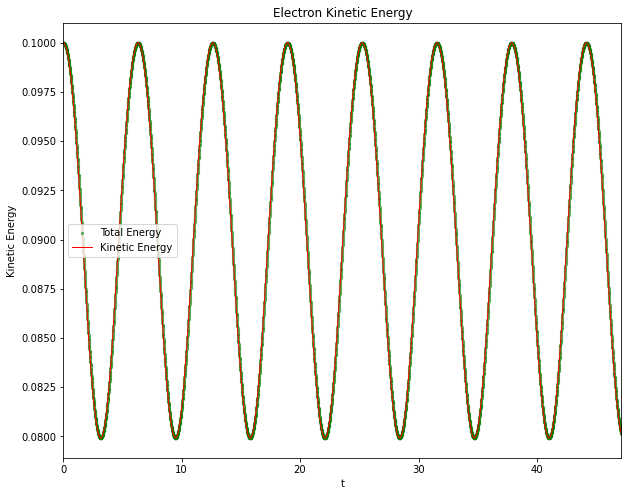

In [16]:
K = np.sqrt(e_vx_t ** 2 + e_vy_t ** 2)
total_energy = K+ele_energy
plt.scatter(t, total_energy, label="Total Energy", s=5, alpha=0.5, c="g")
plt.plot(t, K, "r", label="Kinetic Energy", linewidth=1)
plt.xlim(0, t.max())
plt.xlabel("t")
plt.ylabel("Kinetic Energy")
plt.legend()
plt.title("Electron Kinetic Energy");

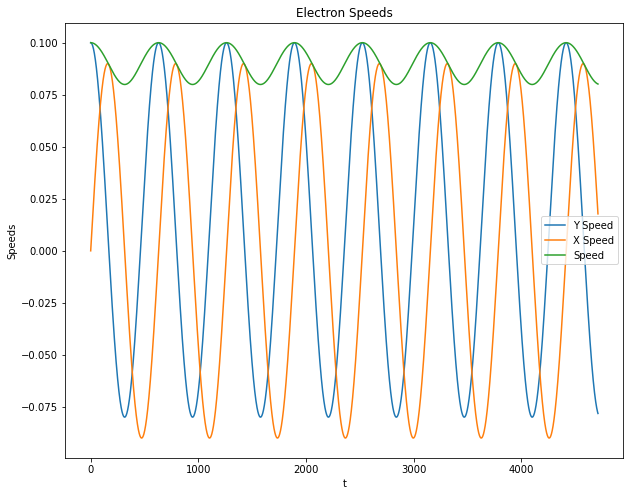

In [17]:
plt.plot(e_vx_t, label="Y Speed")
plt.plot(e_vy_t, label="X Speed")
plt.plot(np.sqrt(e_vx_t**2 + e_vy_t**2), label="Speed")
plt.xlabel("t")
plt.ylabel("Speeds")
plt.title("Electron Speeds")
plt.legend()
plt.show()

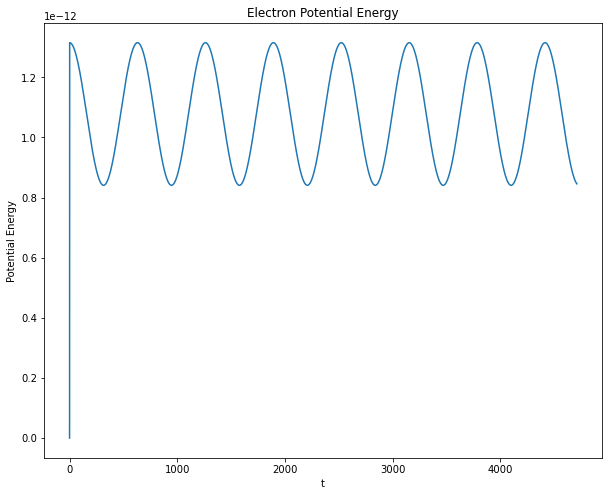

In [18]:
plt.plot(ele_energy)
plt.xlabel("t")
plt.ylabel("Potential Energy")
plt.title("Electron Potential Energy")
plt.show()

## Zero B and Spatial Varying E

In [27]:
import em1d as zpic
# Time step
dt = 0.01

# Simulation time
# tmax = 22.8

# Number of cells
nx = 64

# Simulation box size
box = 12


## Plasma slabs
# Particles per cell
ppc = 4

def custom_n0(x):
    if x > 1.2 and x < 1.4:
        return 1.0
    else:
        return 0.0
# Use a custom density profile
dens = zpic.Density(type="custom", custom=custom_n0)
# Set up a super low density
dens.n = 1e-10
# give it a small velocity to kick of the motion
ufl = 0
# create the species
electrons = zpic.Species("electrons", m_q=-1, ppc=ppc, density=dens, ufl=[ufl, 0, 0])

# Initialize simulation
sim = zpic.Simulation(nx, box, dt, species=electrons)

#
electrons.n_sort = 0

def E( ix, dx ):
    x = (ix+0.5)*dx
    return [-0.01*x,0,0]
ext = zpic.ExternalField(E_type="custom", E_custom=E)

sim.emf.set_ext_fld(ext)
# sim.set_moving_window()
ele_part_rep = []
ele_energy = []
# pos_energy = []
while sim.t < 16 * np.pi:
    print("n = {:d}, t = {:g}".format(sim.n, sim.t), end="\r")
    # store the electron trajectories
    ele_part_rep.append(electrons.particles[0].copy())
    ele_energy.append(electrons.energy)
    sim.iter()


In [28]:
# convert trajectories to position arrays
e_posx_t = [(i["ix"] + i["x"]) * box / nx for i in ele_part_rep]

# create time array
t = np.linspace(0, sim.t, sim.n)

e_vx_t = np.array([(i["ux"]) for i in ele_part_rep])


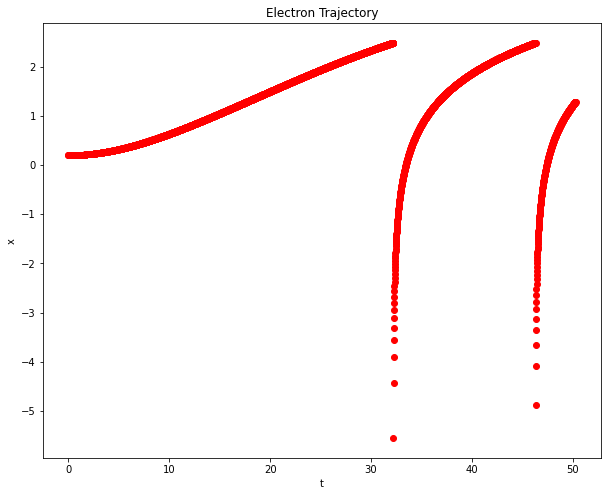

In [29]:
plt.plot(t, np.log(e_posx_t), "ro")
plt.xlabel("t")
plt.ylabel("x")
plt.title("Electron Trajectory");

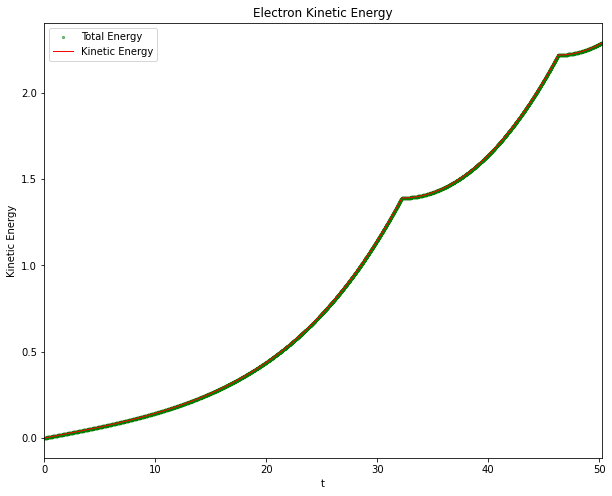

In [30]:
K = np.sqrt(e_vx_t ** 2)
total_energy = K+ele_energy
plt.scatter(t, total_energy, label="Total Energy", s=5, alpha=0.5, c="g")
plt.plot(t, K, "r", label="Kinetic Energy", linewidth=1)
plt.xlim(0, t.max())
plt.xlabel("t")
plt.ylabel("Kinetic Energy")
plt.legend()
plt.title("Electron Kinetic Energy");

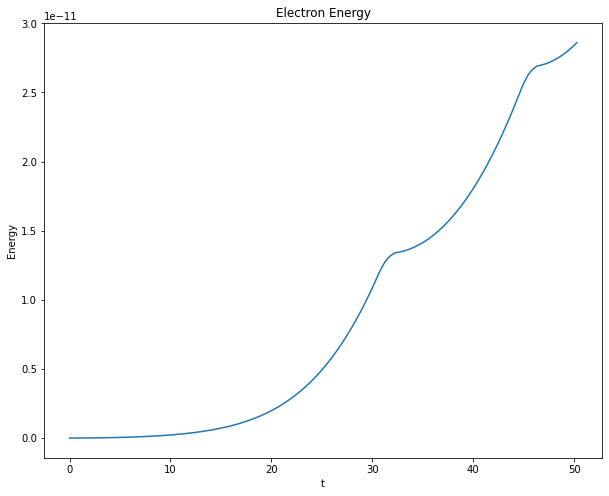

In [31]:
plt.plot(t, ele_energy)
plt.xlabel("t")
plt.ylabel("Energy")
plt.title("Electron Energy")
plt.show()